In [ ]:
# 친밀도 전파 알고리즘(클러스터링)

from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

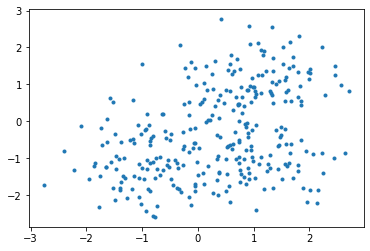

In [ ]:
centers = [[1,1], [1,-1], [-1,-1]]      # center를 미리 지정
X, _ = make_blobs(
    n_samples = 300,
    centers = centers,
    cluster_std = 0.7,
    shuffle = True,
    random_state = 5
)

plt.scatter(X[:,0],X[:,1],marker = '.')

In [ ]:
model = AffinityPropagation(preference = -60).fit(X)          # 알고리즘 코드 구현 / preference: 자기 유사도

# 결과 파악
cluster_centers_indices = model.cluster_centers_indices_      # 샘플들 센터들의 인덱스 숫자(파라미터 값에 따라 변동)
labels = model.labels_                                        # sample 300개의 각 클래스 k
print(cluster_centers_indices)    # [ 62 168 173 246 268] 
# print(cluster_centers_indices[3])
print(labels)                    
print(type(labels))
n_clusters_= len(cluster_centers_indices)                     # cluster 개수

[ 72 105 155 251]
[0 2 2 0 3 3 1 0 1 0 1 3 2 0 0 3 3 0 1 0 0 3 2 3 2 0 1 0 2 1 3 1 0 2 2 0 1
 0 3 2 0 1 2 1 2 2 2 0 2 0 1 2 1 3 0 0 2 2 0 3 3 1 3 1 0 1 2 0 1 3 3 1 0 2
 3 2 0 1 0 1 2 2 2 2 2 3 1 3 0 0 2 3 3 0 0 3 1 2 3 2 1 3 0 2 2 1 0 2 1 1 3
 3 2 0 2 0 3 2 2 1 1 0 1 0 2 0 2 2 2 3 0 0 3 2 3 2 1 2 0 0 2 0 0 0 3 3 1 3
 0 2 2 1 2 2 3 2 2 2 3 1 3 3 3 3 0 0 3 2 1 1 3 3 1 0 1 0 3 0 1 1 3 2 0 0 1
 0 1 0 3 3 3 1 3 0 0 0 0 3 0 3 0 1 3 1 0 3 0 2 3 0 3 0 1 0 3 2 0 0 0 3 0 1
 0 3 2 2 1 2 3 0 2 3 2 2 0 3 3 0 0 0 0 1 1 0 1 0 0 2 1 3 0 3 3 0 1 3 3 2 0
 3 0 1 0 0 0 3 0 1 3 1 1 1 2 0 0 0 1 1 1 1 0 1 1 3 0 2 1 0 1 0 0 0 0 2 0 2
 0 0 3 3]
<class 'numpy.ndarray'>


[-1.04745656 -1.15973019]
[1.34549036 1.35034113]
[0.62885631 0.29900008]
[ 1.24225843 -1.35441709]


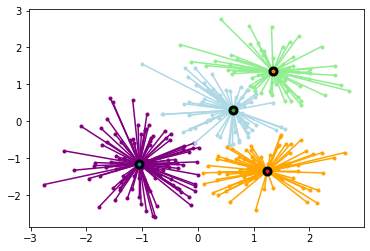

In [ ]:
# 클러스터 시각화

from itertools import cycle

colors_list = "purple", "lightgreen", "lightblue", "orange", "tomato"
colors = cycle(colors_list)

for k,col in zip(range(n_clusters_), colors):
  '''
  1. labels의 각 인덱스 별 해당 클래스, k번째 클래스의 멤버들을 찾겠다 ==> class_mem
  2. cluster center index들의 x,y 좌표, k번째 클러스터 센터의 좌표 ==> cluster_center
  3. labels 클래스 별 시각화
  4. for loop으로 클래스 k별 샘플(lables들)의 x,y 좌표를 돌면서 k의 센터와 해당 샘플들을 잇는 선 그려주기
  5. 센터들 표시
  '''
  class_mem = labels == k       
  # print(class_mem)                                                          # 클래스 별 샘플들의 True / False 행렬로 출력
  # print(X[class_mem])                                                       # 클래스 별 샘플들의 x , y 좌표가 행렬로 출력
  cluster_center = X[cluster_centers_indices[k]]
  print(cluster_center)
  plt.plot(X[class_mem,0], X[class_mem,1], col, ls=' ', marker = '.')                               # labels의 k 클래스별 x, y
  for x in X[class_mem]:  
    plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)       # [센터의 x좌표, 샘플의 x좌표], [센터의 y좌표, 샘플의 y좌표]
  plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.show()